<a href="https://colab.research.google.com/github/ShrikantAhire/Store-Sales-and-Profit-Analysis/blob/main/Modeling_Linear_Regression_Using_Tensorflow_and_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

#fix seed value to make training deterministic
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

1 Dataset Exploration

1.1 Load the Boston Housing Dataset

In [3]:
#Load Dataset
(X_train, y_train), (X_test, y_test)=boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input Feature: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 [==============================] - 0s 0us/step
(404, 13)


Input Feature:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


1.2 Extract Features from the Dataset

In [4]:
boston_features={
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)
X_test_1d=X_test[:, boston_features["Average Number of Rooms"]]

(404,)


1.3 Plot the Features

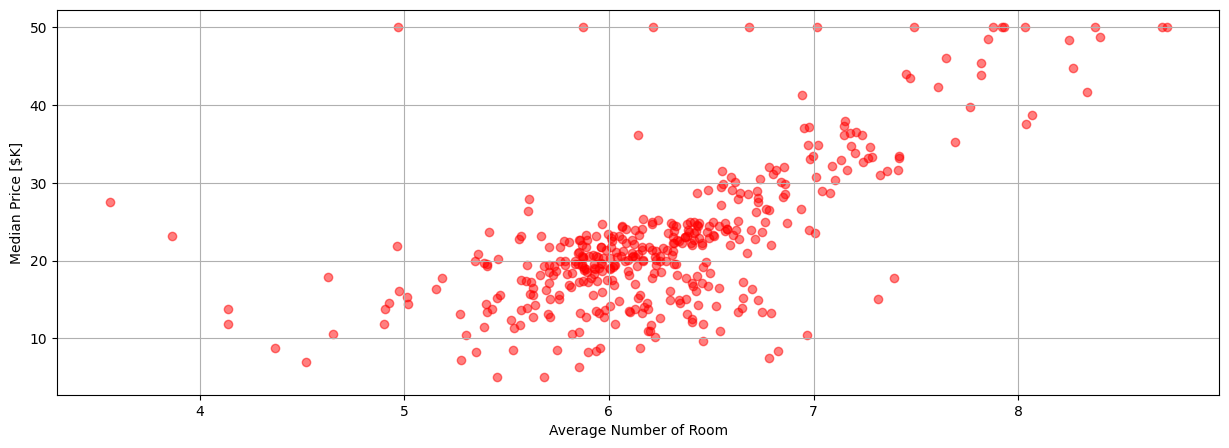

In [5]:
#1.3 Plot the Features
plt.figure(figsize=(15,5))

plt.xlabel("Average Number of Room")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="red", alpha=0.5)

**Define the Keras Model**

In [6]:
model = Sequential()

#Define the model consisting of a single Neuron
model.add(Dense(units=1, input_shape=(1,)))

#Display Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compile the Model**

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005),loss="mse")

**Train the Model**

In [8]:
history=model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3
)

Epoch 1/101
18/18 [==============================] - 1s 13ms/step - loss: 376.0175 - val_loss: 436.6075
Epoch 2/101
18/18 [==============================] - 0s 6ms/step - loss: 350.3278 - val_loss: 411.8203
Epoch 3/101
18/18 [==============================] - 0s 4ms/step - loss: 328.5620 - val_loss: 388.9292
Epoch 4/101
18/18 [==============================] - 0s 4ms/step - loss: 308.1074 - val_loss: 366.8133
Epoch 5/101
18/18 [==============================] - 0s 4ms/step - loss: 288.1337 - val_loss: 345.1137
Epoch 6/101
18/18 [==============================] - 0s 4ms/step - loss: 269.0378 - val_loss: 324.6270
Epoch 7/101
18/18 [==============================] - 0s 4ms/step - loss: 250.9580 - val_loss: 304.7654
Epoch 8/101
18/18 [==============================] - 0s 4ms/step - loss: 233.7987 - val_loss: 286.3186
Epoch 9/101
18/18 [==============================] - 0s 4ms/step - loss: 217.4278 - val_loss: 268.1779
Epoch 10/101
18/18 [==============================] - 0s 4ms/step - loss

**Plot the Training Results**

In [11]:
def plot_loss(history):
  plt.figure(figsize=(20,5))
  plt.plot(history.history['loss'],'g',label="Training Loss")
  plt.plot(history.history['val_loss'],'r',label="Validation Loss")
  plt.xlim([0,100])
  plt.ylim([0,300])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

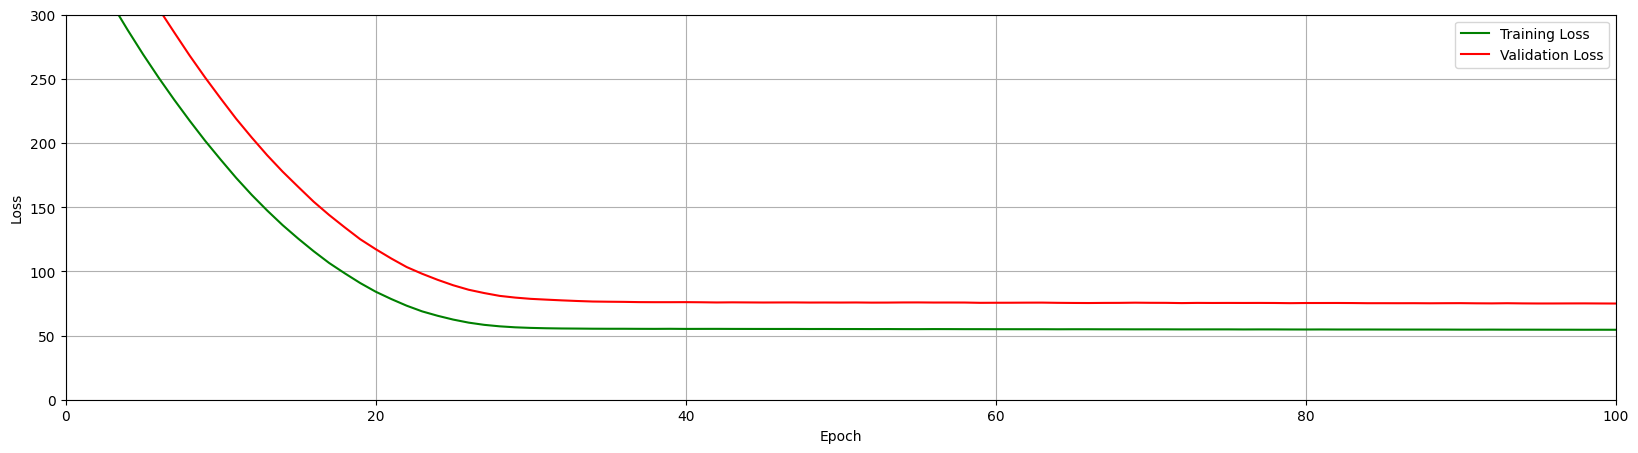

In [12]:
plot_loss(history)

**Make Predictions using the Model**

In [18]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [4, 5, 6, 7, 8,10]
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 [==============================] - 0s 40ms/step
Predicted price of a home with 4 rooms: $14.7K
Predicted price of a home with 5 rooms: $18.0K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.7K
Predicted price of a home with 8 rooms: $28.0K
Predicted price of a home with 10 rooms: $34.7K


**Plot the Model and the Data**

In [19]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 92ms/step


In [22]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

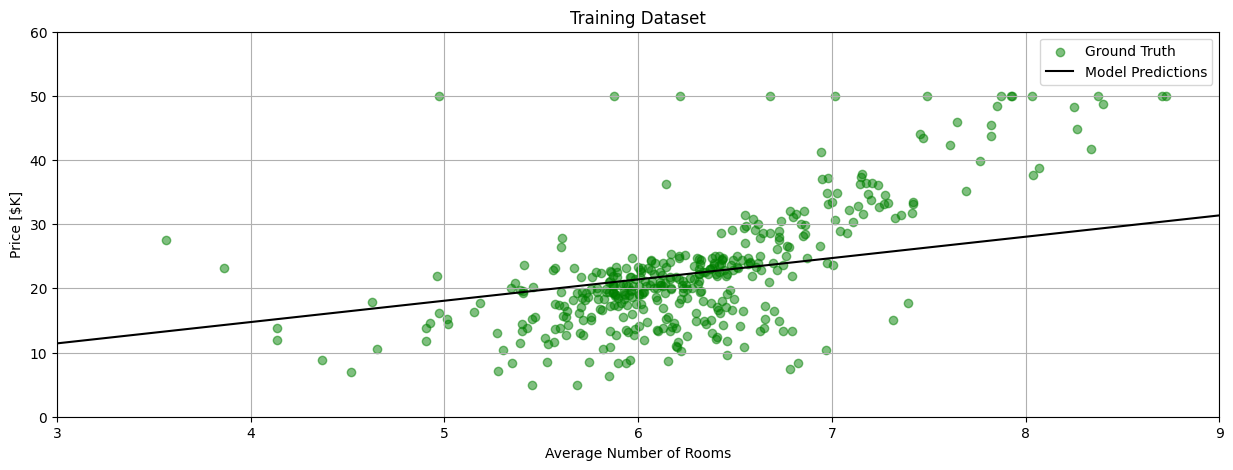

In [23]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

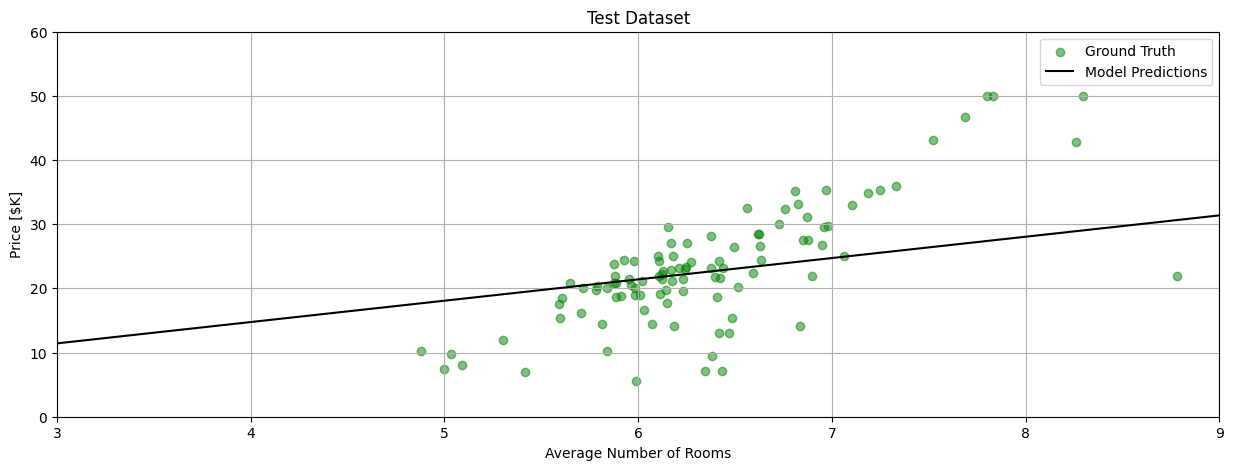

In [24]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')